# **Bikes Price Prediction**

In [127]:
import numpy as np
import pandas as pd
import sklearn

In [128]:
# Used for Reading the file
df = pd.read_csv("dataset/Used_Bikes.csv") 
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [129]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [130]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [131]:
df.dropna(inplace = True)

In [132]:
df.duplicated().sum()

np.int64(25324)

In [133]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [134]:
df.drop(columns = ['bike_name'], inplace=True)

In [135]:
df.drop(columns = ['city'], inplace = True)

In [136]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [137]:
dt = {
    "First Owner" : 1,
    "Second Owner" : 2,
    "Third Owner" : 3,
    "Fourth Owner Or More" : 4
}
df['owner'] = df['owner'].map(dt)

In [138]:
df['owner'].unique()

array([1, 2, 3, 4])

In [139]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [140]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [141]:
encoder = LabelEncoder()

In [142]:
output = encoder.fit_transform(df['brand'])

In [143]:
output.__class__

numpy.ndarray

In [144]:
output

array([19, 17, 20, ...,  4,  1,  1], shape=(7324,))

In [145]:
df['brand'] = output
df

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,19
1,119900.0,11000.0,1,4.0,350.0,17
2,600000.0,110.0,1,8.0,675.0,20
3,65000.0,16329.0,1,4.0,180.0,19
4,80000.0,10000.0,1,3.0,150.0,21
...,...,...,...,...,...,...
9362,25000.0,48587.0,1,8.0,150.0,5
9369,35000.0,60000.0,1,9.0,220.0,1
9370,450000.0,3430.0,1,4.0,750.0,4
9371,139000.0,21300.0,1,4.0,400.0,1


In [146]:
x = df.drop('price', axis = 1)
y = df[['price']]

In [147]:
print(x)
print(y)

      kms_driven  owner  age  power  brand
0        17654.0      1  3.0  110.0     19
1        11000.0      1  4.0  350.0     17
2          110.0      1  8.0  675.0     20
3        16329.0      1  4.0  180.0     19
4        10000.0      1  3.0  150.0     21
...          ...    ...  ...    ...    ...
9362     48587.0      1  8.0  150.0      5
9369     60000.0      1  9.0  220.0      1
9370      3430.0      1  4.0  750.0      4
9371     21300.0      1  4.0  400.0      1
9372      7127.0      1  5.0  220.0      1

[7324 rows x 5 columns]
         price
0      35000.0
1     119900.0
2     600000.0
3      65000.0
4      80000.0
...        ...
9362   25000.0
9369   35000.0
9370  450000.0
9371  139000.0
9372   80000.0

[7324 rows x 1 columns]


In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
y_test

,price
4909,88400.0
1942,102850.0
5763,67000.0
4800,30000.0
7614,20000.0
...,...
5653,395000.0
609,140000.0
4211,54500.0
6379,114000.0


In [149]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5859, 5), (1465, 5), (5859, 1), (1465, 1))

In [150]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [151]:
lr.fit(x_train, y_train)

LinearRegression()

In [152]:
lr.score(x_train, y_train) * 100

65.83186303624649

In [153]:
lr.score(x_test, y_test) * 100

71.75947383086566

In [154]:
pred = lr.predict(x_test)
pred

array([[150683.50273601],
       [246408.76411648],
       [ 94949.23656378],
       ...,
       [ 37079.00523583],
       [238205.04024506],
       [ 36702.67235501]], shape=(1465, 1))

In [155]:
y_test['pred'] = pred.ravel()
y_test

,price,pred
4909,88400.0,150683.502736
1942,102850.0,246408.764116
5763,67000.0,94949.236564
4800,30000.0,2790.775522
7614,20000.0,6456.787056
...,...,...
5653,395000.0,411532.041280
609,140000.0,102647.279228
4211,54500.0,37079.005236
6379,114000.0,238205.040245


In [156]:
import os, joblib

In [157]:
os.makedirs('../Models', exist_ok = True)
joblib.dump(lr, '../Models/linear_bike_price_model.pkl')

['../Models/linear_bike_price_model.pkl']

## LOSS FUNCTION
 - MSE(mean squared error)
 - MAE(mean absolute error)
 - RMSE(root mean squared error)

In [158]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(y_test['price'], y_test['pred']))
print("MAE : ", mean_absolute_error(y_test['price'], y_test['pred']))
print("RMSE : ", root_mean_squared_error(y_test['price'], y_test['pred']))

MSE :  5498068117.732572
MAE :  37787.34371410071
RMSE :  74148.9589794258


## Huber Loss
 - Confusion Matix
 - Accuracy
 - Precision
 - Recall
 - F1 Score

In [159]:
y_test['pred'] = (y_test['pred']  > 0.5).astype(int)
y_test['price'] = (y_test['price']  > 0.5).astype(int)

In [160]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
print("Confusion Matrix : ",confusion_matrix(y_test['price'], y_test['pred']))
print("Precision Score : ",precision_score(y_test['price'], y_test['pred']))
print("F1 Score : ", f1_score(y_test['price'], y_test['pred']))
print("Accuracy Score : ", accuracy_score(y_test['price'], y_test['pred']))
print("Recall Score : ", recall_score(y_test['price'], y_test['pred']))

Confusion Matrix :  [[   0    0]
 [  89 1376]]
Precision Score :  1.0
F1 Score :  0.9686730024639212
Accuracy Score :  0.9392491467576792
Recall Score :  0.9392491467576792


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test['price'], y_test['pred'])
cm

array([[   0,    0],
       [  89, 1376]])

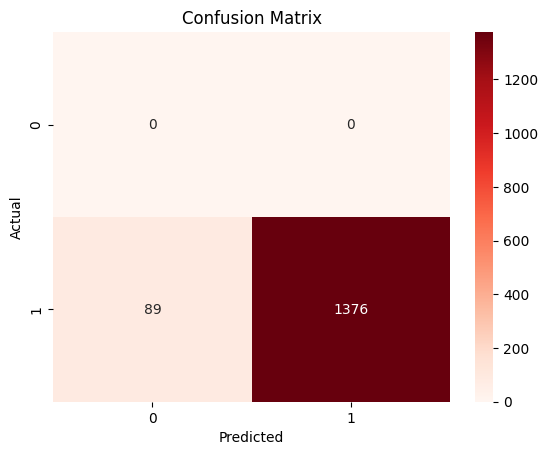

In [162]:
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [165]:
dtc.score(x_train, y_train) * 100

94.70899470899471

In [168]:
dtc.predict(x_test)

array([109400., 158300.,  40900., ..., 110000., 102000.,  86900.],
      shape=(1465,))